In [129]:
import torch
import numpy as np
import sys, os
os.environ['OCEANDATA'] = '/Volumes/LoCe/oceandata/'

sys.path.append('../')
from configs.base_config import TrainingConfig
from utils import get_dataloader, TransformFields
import matplotlib.pyplot as plt
import einops
from torch.nn.functional import interpolate
import pandas as pd
import seaborn as sns

In [82]:
# Original path : /gpfswork/rech/omr/udu91zn/diffusionmodels/diffModel_experiences/z87envpm
base_path= '/Volumes/LoCe/oceandata/models/dino-fusion/' #'/Users/emeunier/Documents/scai/'
training_tar = ''
config = TrainingConfig()

In [83]:
train_dataloader = get_dataloader(config.data_file, batch_size=config.train_batch_size, fields=config.fields)
config.data_shape = train_dataloader.get_data_shape()
idt = iter(train_dataloader)
batch = next(idt)

Reading infos in /Volumes/LoCe/oceandata//Dino-Fusion/dino_1_4_degree_coarse_130924.tar


In [8]:
trf = train_dataloader.get_transform()

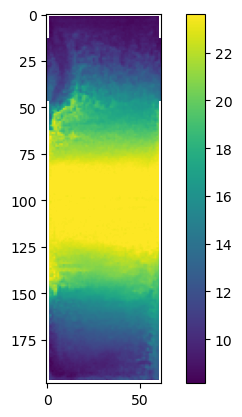

In [35]:
plt.imshow(sample_generated['toce.npy'][0])
plt.colorbar()

In [85]:
sample_generated['toce.npy'].shape

torch.Size([36, 199, 62])

In [69]:
np.save('generated_soce_7_z87envpm.npy', sample_generated['soce.npy'].numpy())

In [70]:
np.save('generated_toce_7_z87envpm.npy', sample_generated['toce.npy'].numpy())

In [71]:
np.save('generated_ssh_7_z87envpm.npy', sample_generated['ssh.npy'].numpy())

In [77]:
a = np.load('generated_toce_7_z87envpm.npy')
a.shape

(36, 199, 62)

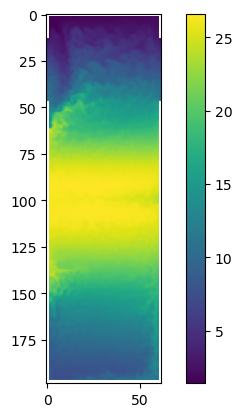

In [34]:
plt.imshow(sample['toce.npy'][0])
plt.colorbar()

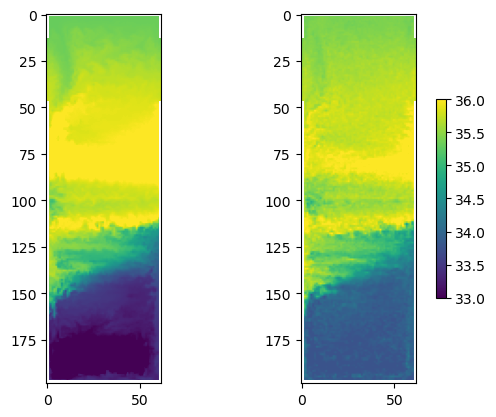

In [80]:
fig, axs = plt.subplots(1,2)
im1 = axs[0].imshow(sample['soce.npy'][0], vmin=33, vmax=36)
axs[1].imshow(sample_generated['soce.npy'][0], vmin=33, vmax=36)
cbar = fig.colorbar(im1, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)

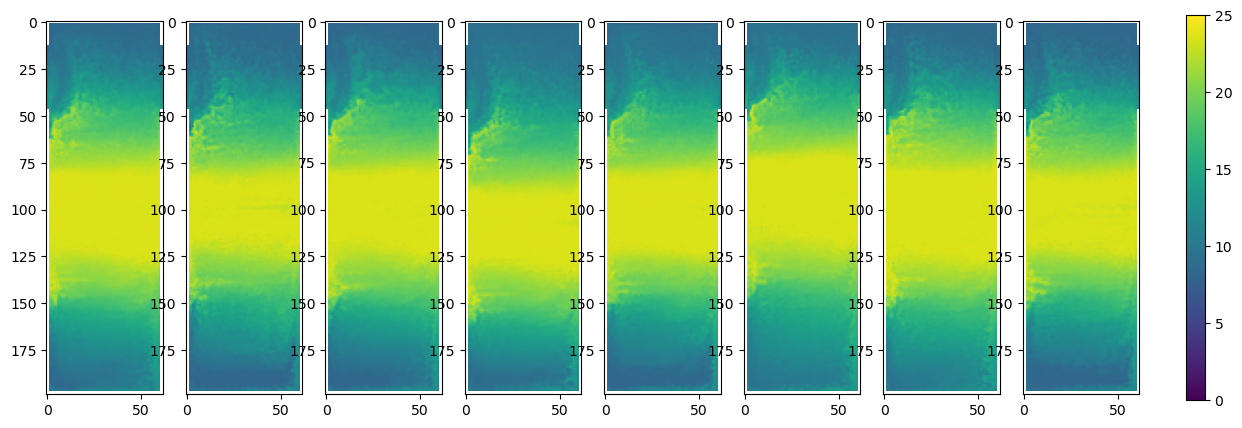

In [66]:
fig, axs = plt.subplots(1,8, figsize=(15,5))
for i in range(8) : 
    sample_generated = trf.uncall(generated_fields[i])
    im1 = axs[i].imshow(sample_generated['toce.npy'][0], vmin=0, vmax=25)
cbar = fig.colorbar(im1, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)

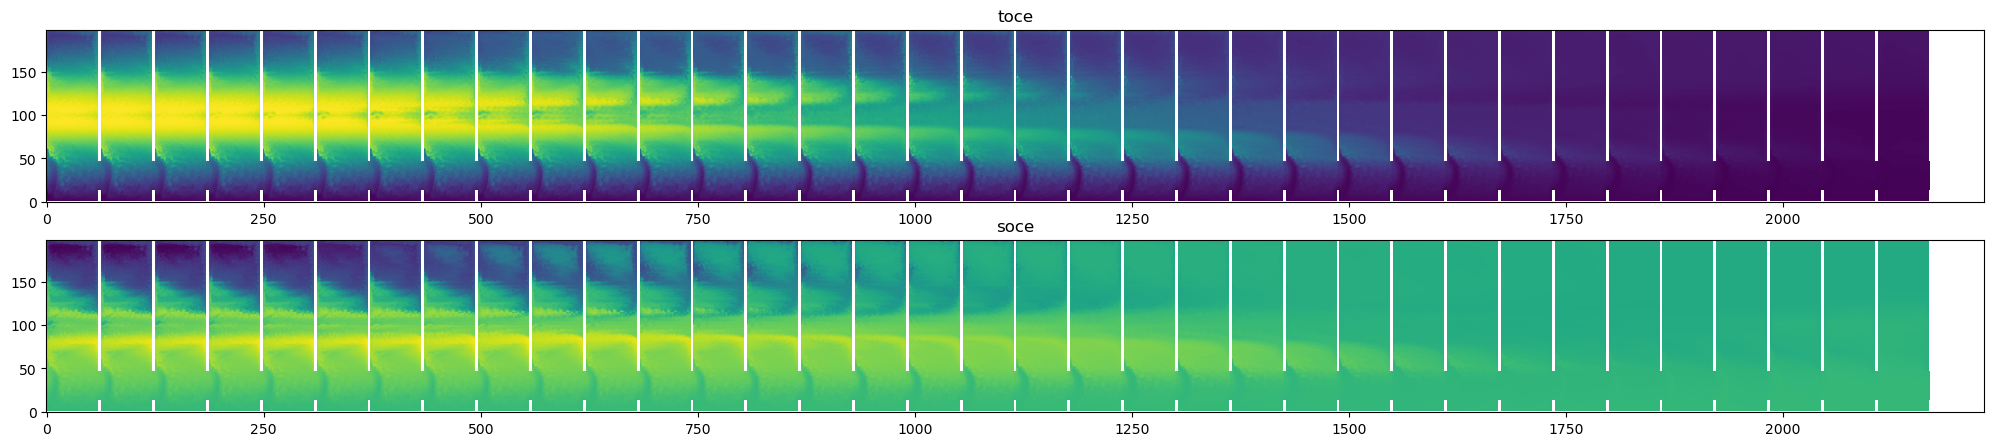

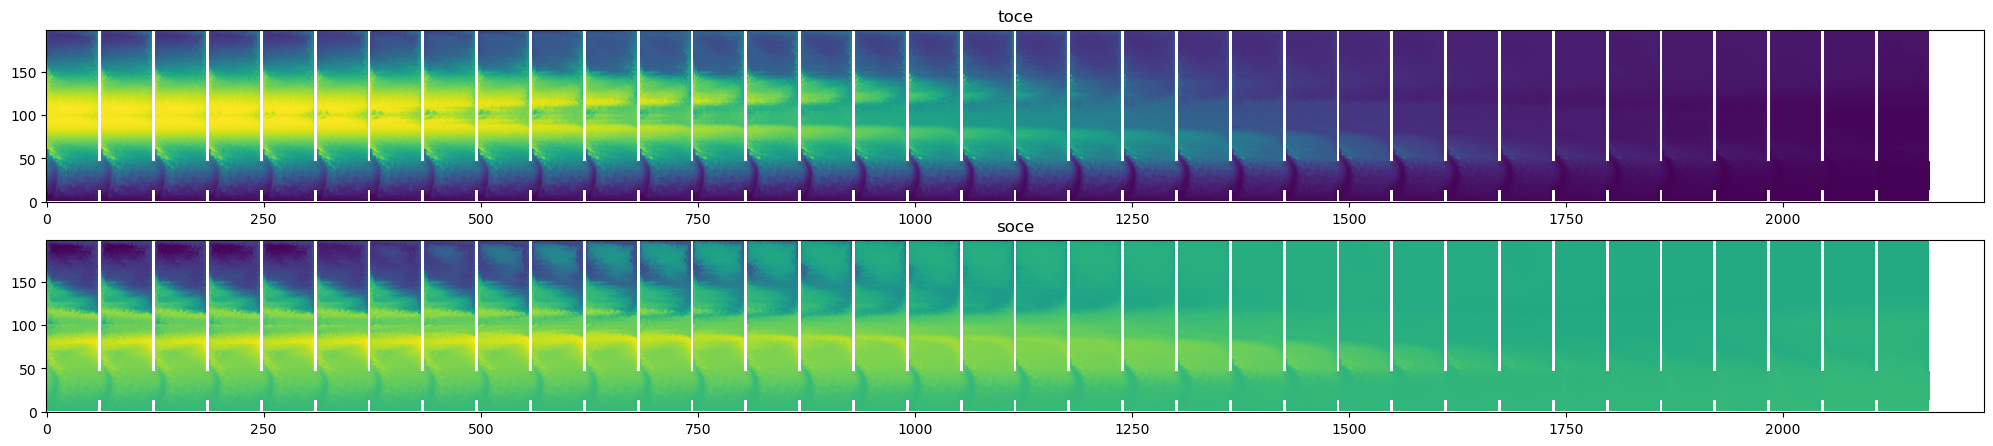

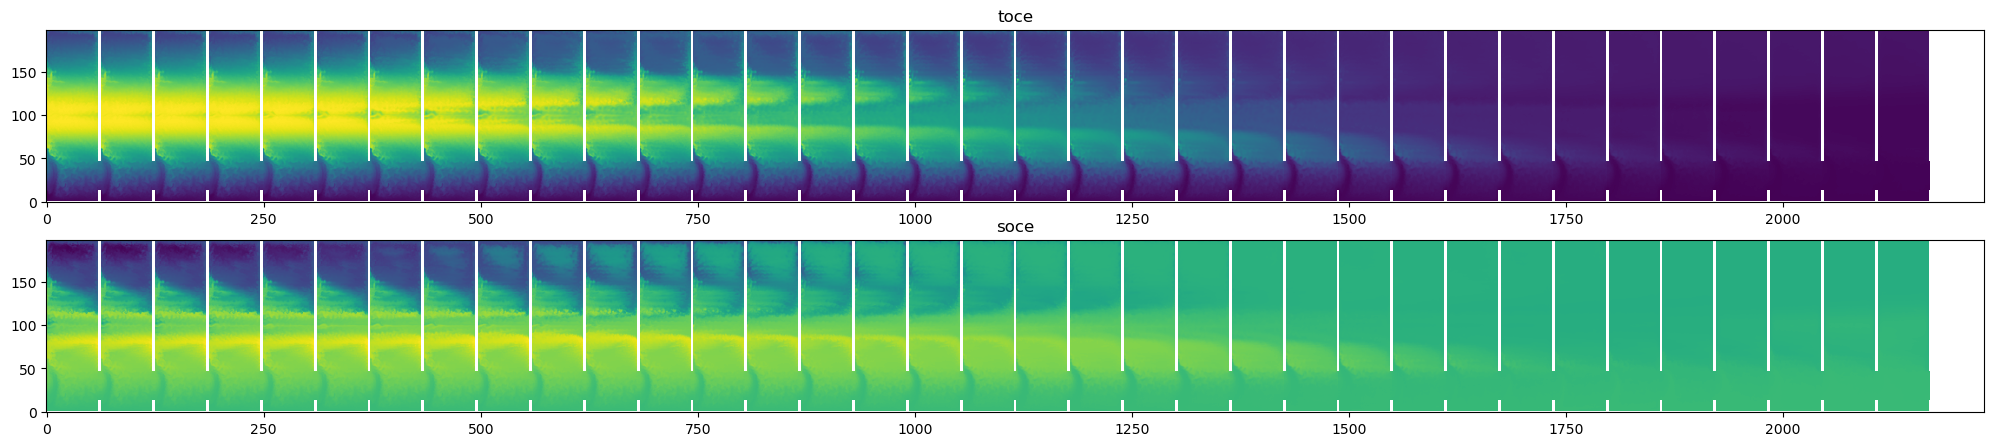

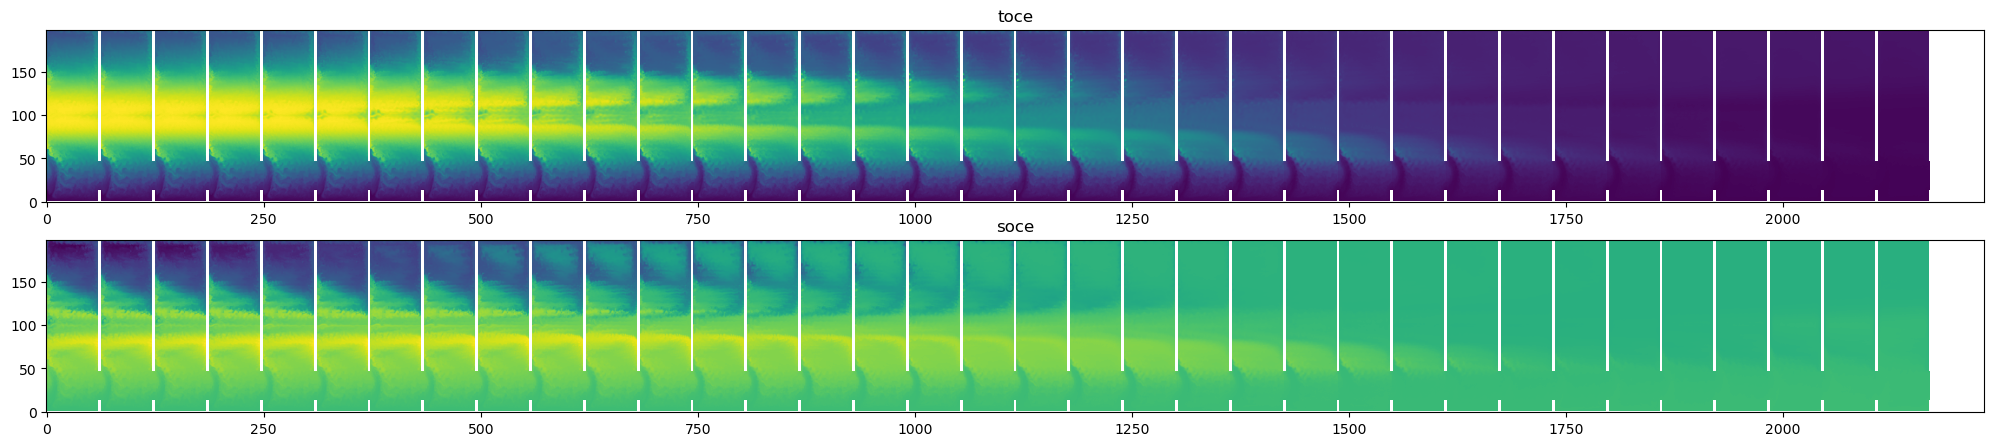

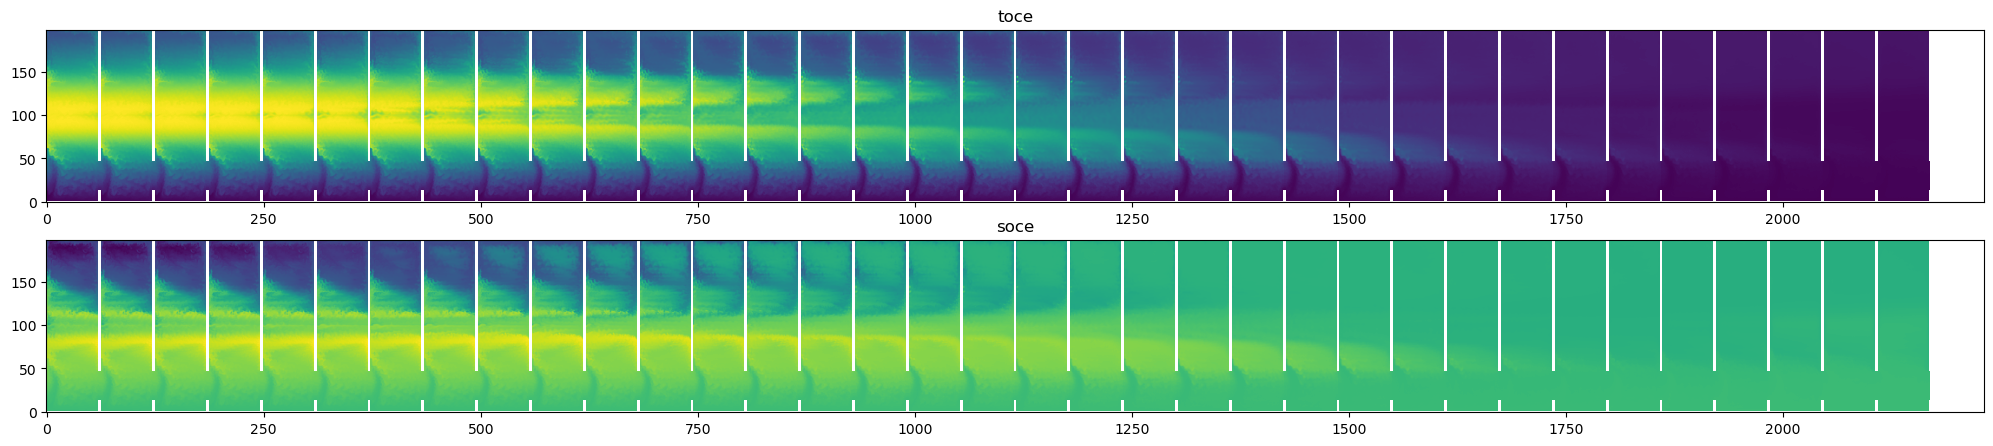

In [9]:
for s in range(5) : 
    sample = trf.uncall(batch[s])
    fig, axs = plt.subplots(2,1,figsize=(25,5))

    for i, t in enumerate(['toce', 'soce']) :
        axs[i].set_title(t)
        axs[i].imshow(einops.rearrange(sample[f'{t}.npy'], 'z w h -> w (z h)'))
        axs[i].invert_yaxis()

In [61]:
path_generated=f'{base_path}/z87envpm/epoch_4950.npy'
generated_fields = torch.tensor(np.load(path_generated))
sample_generated = trf.uncall(generated_fields[7])

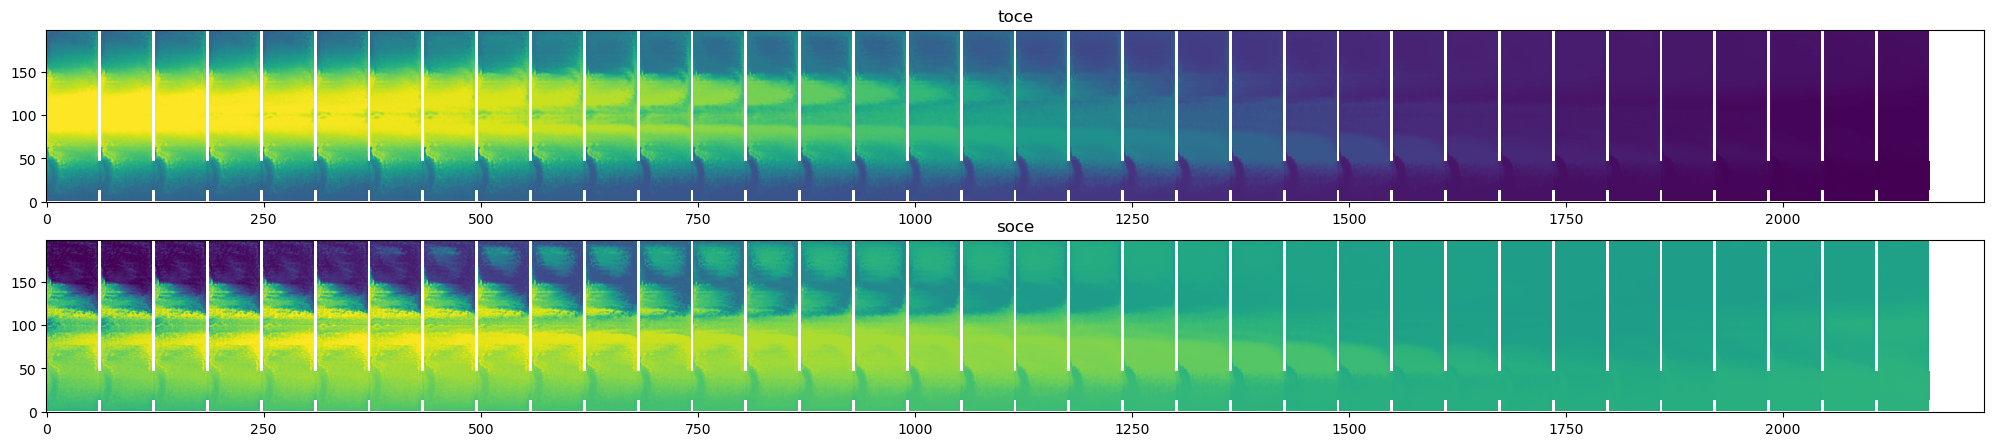

In [20]:
fig, axs = plt.subplots(2,1,figsize=(25,5))

for i, t in enumerate(['toce', 'soce']) :
    axs[i].set_title(t)
    axs[i].imshow(einops.rearrange(sample_generated[f'{t}.npy'], 'z w h -> w (z h)'))
    axs[i].invert_yaxis()

In [111]:
plt.imshow(batch['toce.npy'][0, 0], origin='lower')
plt.colorbar()

IndexError: too many indices for tensor of dimension 4

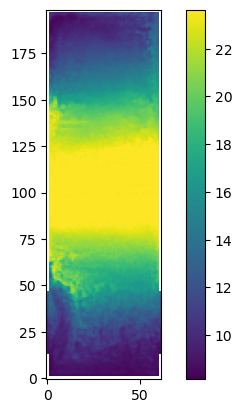

In [112]:
plt.imshow(sample_generated['toce.npy'][0, 0], origin='lower')
plt.colorbar()

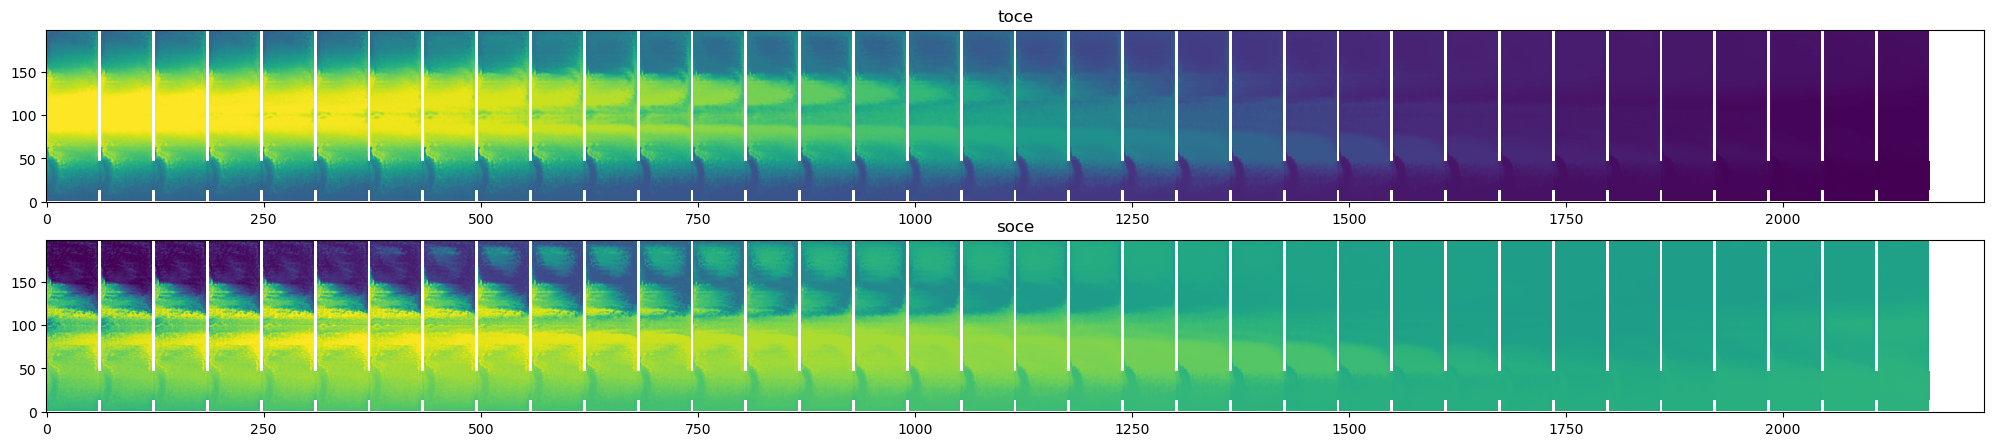

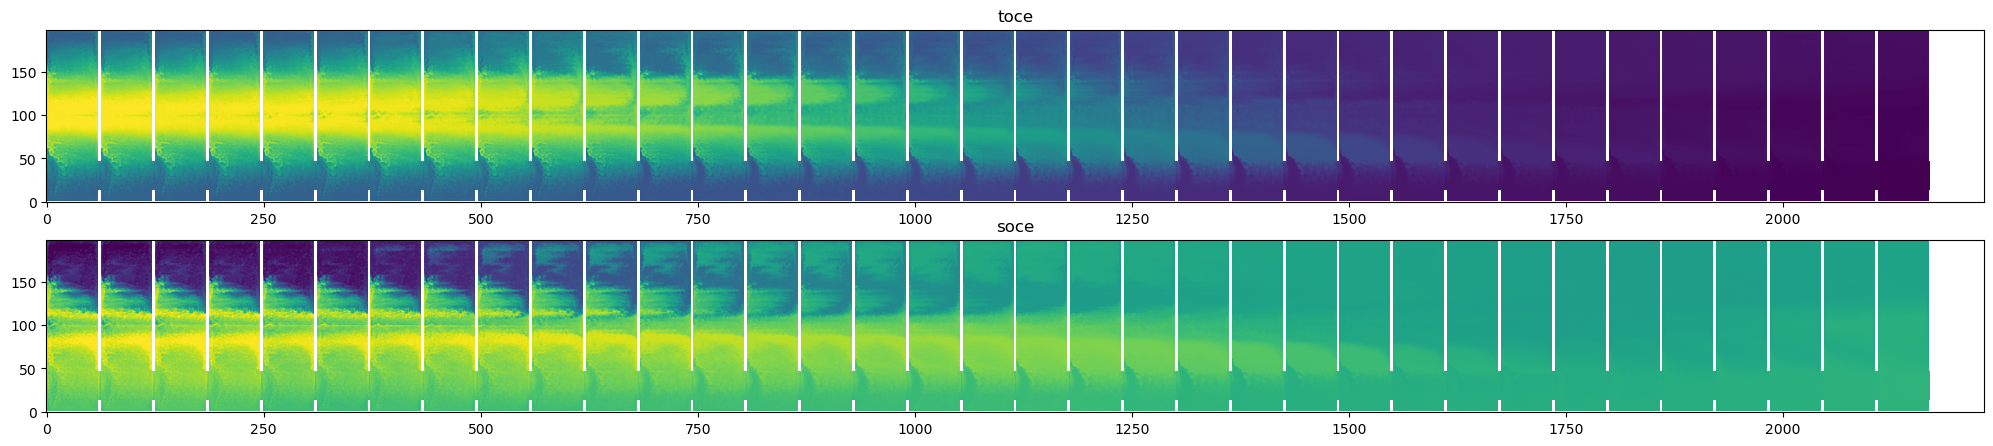

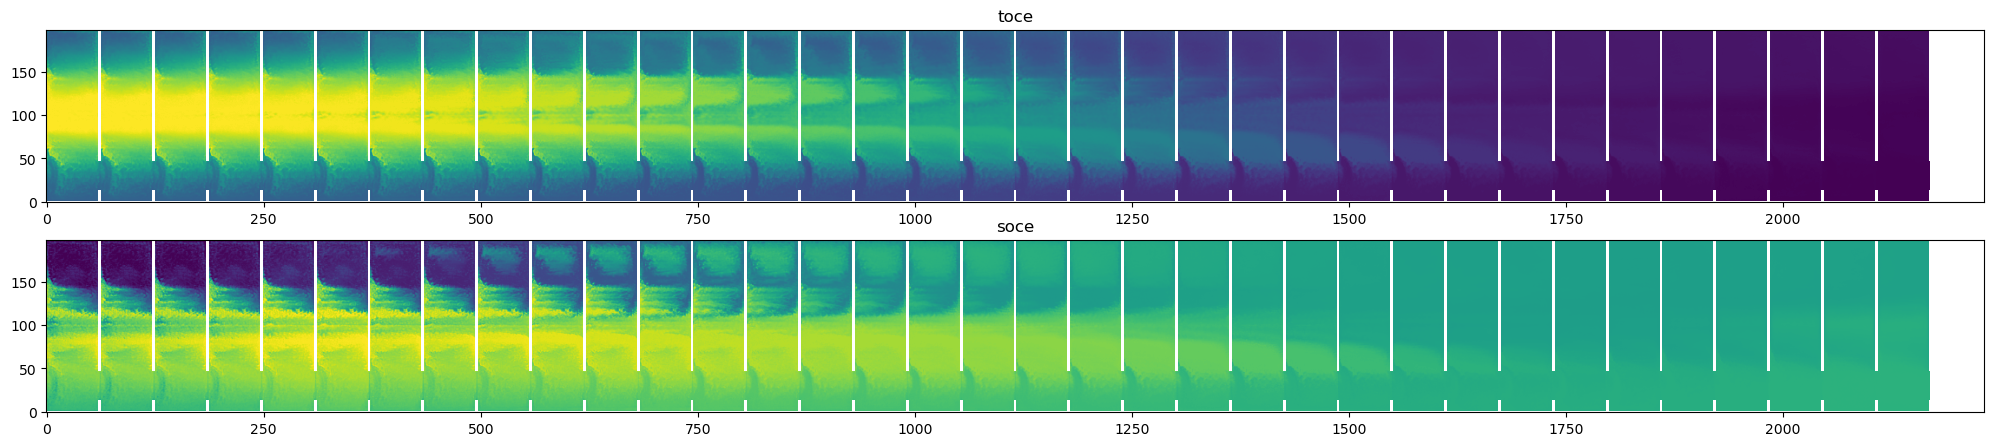

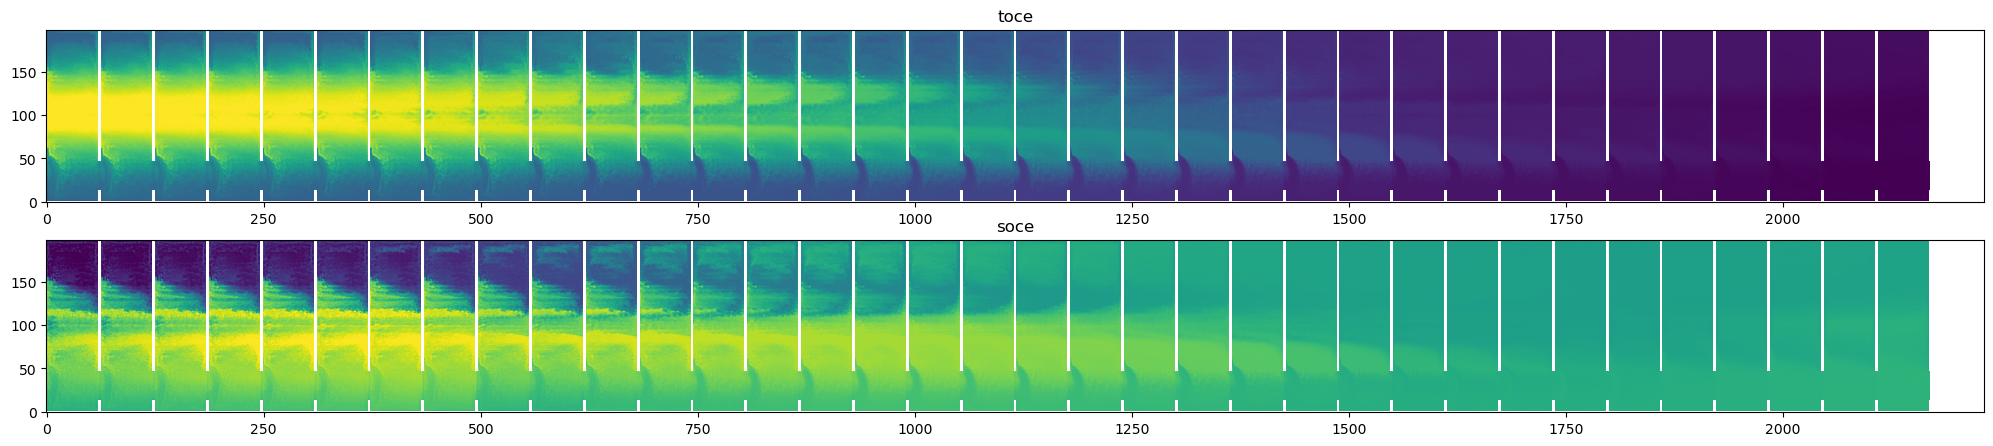

In [12]:


for s in range(5) :

    sample_generated = trf.uncall(generated_fields[s])
    fig, axs = plt.subplots(2,1,figsize=(25,5))

    for i, t in enumerate(['toce', 'soce']) :
        axs[i].set_title(t)
        axs[i].imshow(einops.rearrange(sample_generated[f'{t}.npy'], 'z w h -> w (z h)'))
        axs[i].invert_yaxis()

In [130]:
sample_generated_r = [trf.uncall(gf) for gf in generated_fields]

sample_generated = {}
for key in sample_generated_r[0].keys():
    sample_generated[key] = np.stack([d[key] for d in sample_generated_r])

In [131]:

areas = {'south' : slice(5, 40), 'north' : slice(170, 205)}

d = []
for a in areas : 
    for k in ['toce.npy', 'soce.npy'] : 
        data = np.nanmean(sample_generated[k][:, 0, areas[a], :], axis=(1,2))
        for i  in range(data.shape[0]) : 
            d.append({'batch_gen' : i, 'area' : a, 'field' : k, 'data' : data[i]})
d = pd.DataFrame(d)


In [134]:
plt.subplots(1,2, figsize=(15, 5))

sns.boxplot(x='field', hue='area', data=d, y='data')

<Axes: xlabel='field', ylabel='data'>

dict_keys(['toce.npy', 'soce.npy', 'ssh.npy'])